## Observations and Insights 

When refering to the box and whisker plot that maps the average tumor size at the final time point, both Capomulin and Ramicane tend to have smaller tumor sizes. This suggests that out of the four most promising regimens, these are the two with the best results. 

Also looking at the box and whisker plot, Ceftamin has the largest dispersion. This shows the regimen has a much wider range of results in terms of final tumor volume.

The distribution of sex has a very small difference - under 2%. This suggests that the sex of the mouse does not influence the results of the regemins and may not be an important variable.

In the final scatter plot, the r-squared value suggests a strong correlation between the final tumor measurment and the average mouse size. This could mean that prediction of a final tumor volume could be possible when given the average mouse weight. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata

In [4]:
#study_results

In [5]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
#mouse_study

In [6]:
# Checking the number of mice.
#mouse_study.count()


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned = mouse_study.drop_duplicates(['Mouse ID', 'Timepoint'], keep="last")
#mouse_cleaned


In [8]:
# Checking the number of mice in the clean DataFrame.
#mouse_cleaned.value_counts('Mouse ID')

In [9]:
## Summary Statistics

In [10]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_avg = mouse_cleaned.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

#drug_avg


In [11]:
regimen_groups = mouse_cleaned.groupby('Drug Regimen')

In [12]:
regimen_median = regimen_groups['Tumor Volume (mm3)'].median()
#regimen_median

In [13]:

regimen_var = regimen_groups['Tumor Volume (mm3)'].var()
#regimen_var


In [14]:
regimen_std = regimen_groups['Tumor Volume (mm3)'].std()
#regimen_std

In [15]:
regimen_sem = regimen_groups['Tumor Volume (mm3)'].sem()
#regimen_sem

## Summary Statistics of Mice based on Drug Regimen

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats_df = pd.DataFrame ({
    "Mean": drug_avg,
    "Median": regimen_median,
    "Variance": regimen_var,
    "Standard Deviations": regimen_std,
    "SEM": regimen_sem
    
    
})
regimen_stats_df

,Mean,Median,Variance,Standard Deviations,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics of Mice based on Drug Regimen: Using Aggregation Technique


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line

aggregation = mouse_cleaned.groupby('Drug Regimen')
regimen_stats_agg = aggregation.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
regimen_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_regimen =mouse_cleaned.groupby(['Drug Regimen']).count()["Mouse ID"]
#count_regimen

## Measurements For Each Drug Regimen: Pandas

<AxesSubplot:title={'center':'Mice Count per Treatment'}, xlabel='Drug Regimen', ylabel='Mice Count'>

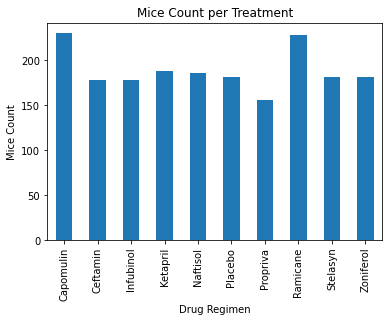

In [19]:
mouse_cleaned.groupby('Drug Regimen').count()["Mouse ID"].plot(kind='bar', legend =False, title="Mice Count per Treatment", ylabel = "Mice Count")


In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mice_list =(mouse_cleaned.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

## Measurements For Each Drug Regimen: PyPlot

Text(0, 0.5, 'Mice Count')

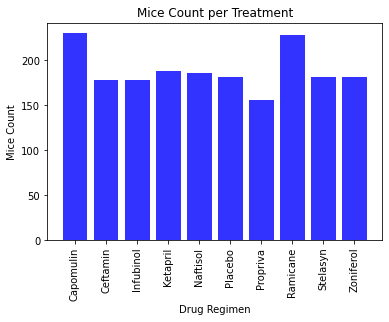

In [21]:
regimen_num = np.arange(len(count_regimen))
#regimen_num

plt.bar(regimen_num, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in regimen_num]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Mice Count per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

## Gender Distribution of Mice Studied: Pandas

<AxesSubplot:title={'center':'Gender Breakdown of Mice'}, ylabel='Mouse ID'>

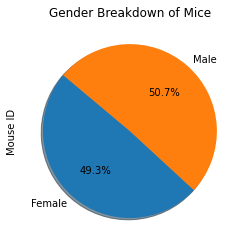

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_cleaned.groupby('Sex').count()["Mouse ID"].plot(kind='pie', title="Gender Breakdown of Mice", autopct="%1.1f%%", shadow=True, startangle=140)

## Gender Distribution of Mice Studied: PyPlot

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mouse_cleaned.groupby(['Sex']).count()['Mouse ID']
gender

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Gender Breakdown of Mice')

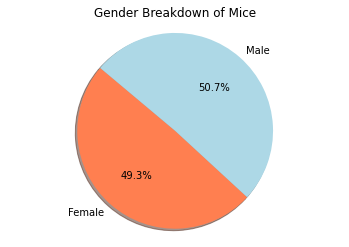

In [24]:
colors = ["coral","lightblue"]
labels = ["Female", "Male"]

plt.pie(gender, labels = labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Gender Breakdown of Mice")

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatmentregimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
capomulin = mouse_cleaned.loc[mouse_cleaned["Drug Regimen"] == "Capomulin",:]
ramicane = mouse_cleaned.loc[mouse_cleaned["Drug Regimen"] == "Ramicane", :]
infubinol = mouse_cleaned.loc[mouse_cleaned["Drug Regimen"] == "Infubinol", :]
ceftamin = mouse_cleaned.loc[mouse_cleaned["Drug Regimen"] == "Ceftamin", :]

In [26]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_greatest = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_tumor_volume = pd.DataFrame(capomulin_greatest)
capomulin_combined = pd.merge(capomulin_tumor_volume, mouse_cleaned, on=("Mouse ID","Timepoint"),how="left")
#capomulin_combined

In [27]:
ramicane_greatest = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_tumor_volume = pd.DataFrame(ramicane_greatest)
ramicane_merge = pd.merge(ramicane_tumor_volume, mouse_cleaned, on=("Mouse ID","Timepoint"),how="left")
#ramicane_merge

In [28]:
infubinol_greatest = infubinol.groupby('Mouse ID').max()['Timepoint']
infubinol_tumor_volume = pd.DataFrame(infubinol_greatest)
infubinol_merge = pd.merge(infubinol_tumor_volume, mouse_cleaned, on=("Mouse ID","Timepoint"),how="left")
#infubinol_merge

In [29]:
ceftamin_greatest = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_tumor_volume = pd.DataFrame(ceftamin_greatest)
ceftamin_merge = pd.merge(ceftamin_tumor_volume, mouse_cleaned, on=("Mouse ID","Timepoint"),how="left")
#ceftamin_merge

## Tumor Volume for Ceftamin, Ramicane, Capomulin, and Infubinol at Last Measurment

In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor = pd.merge(capomulin_combined, ceftamin_merge, how='outer')
final_tumor = pd.merge(final_tumor, infubinol_merge, how='outer')
final_tumor = pd.merge(final_tumor, ramicane_merge, how='outer')
final_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


## Identify Potential Outliers in Capomulin, Ramicane, Infubinol, and Ceftamin Regimens

In [31]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor.loc[final_tumor['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to empty list 
    final_tumor_vol_list.append(final_tumor_vol)
    
    #Upper and lower quartiles, mean, iqr
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    
    #upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    # Print out the result
    print(f"{drug} Regimen: The average tumor volume is {round(mean,2)}mm3.")
    print(f"Outliers for the tumor volume would fall below {round(lower_bound,2)}mm3 or fall above {round(upper_bound,2)}mm3.")
    print(f"There are {outliers.count()} outliers for the {drug} regimen.")

    if outliers.count() > 0:
        for i in outliers.index:
            print(f'The outlier tumor volume is {round(outliers[i], 2)}mm3')
    print('----------------------------------------------------------')

Capomulin Regimen: The average tumor volume is 36.67mm3.
Outliers for the tumor volume would fall below 20.7mm3 or fall above 51.83mm3.
There are 0 outliers for the Capomulin regimen.
----------------------------------------------------------
Ramicane Regimen: The average tumor volume is 36.19mm3.
Outliers for the tumor volume would fall below 17.91mm3 or fall above 54.31mm3.
There are 0 outliers for the Ramicane regimen.
----------------------------------------------------------
Infubinol Regimen: The average tumor volume is 58.18mm3.
Outliers for the tumor volume would fall below 36.83mm3 or fall above 82.74mm3.
There are 1 outliers for the Infubinol regimen.
The outlier tumor volume is 36.32mm3
----------------------------------------------------------
Ceftamin Regimen: The average tumor volume is 57.75mm3.
Outliers for the tumor volume would fall below 25.36mm3 or fall above 87.67mm3.
There are 0 outliers for the Ceftamin regimen.
---------------------------------------------------

## Box and Whisker Plot of Final Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin Regimens Including Outliers Idenified

Text(0, 0.5, 'Final Tumor Volume (mm3)')

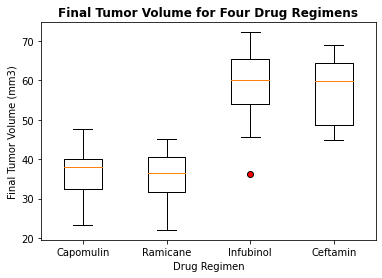

In [32]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r'})

final_tumor_plot.set_title('Final Tumor Volume for Four Drug Regimens', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')


## Tumor Volume over Time for Mouse S185

Text(0.5, 1.0, 'Mouse S185 Tumor Volume over Time')

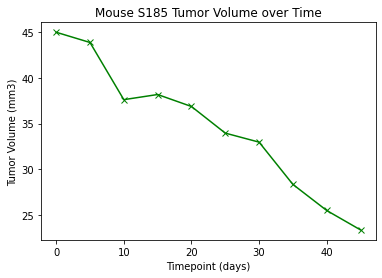

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#capomulin

mouse_id = 's185'
mouse_data = capomulin.loc[capomulin['Mouse ID'] == mouse_id]

# Generate a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='x', color='green')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse S185 Tumor Volume over Time")


## Average Tumor Volume Compared to Average Mouse Weight

Text(0, 0.5, 'Tumor Volume (mm3)')

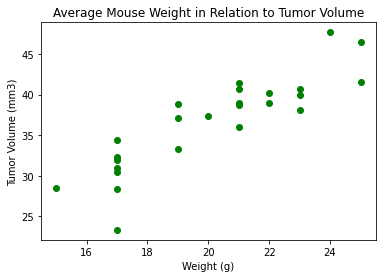

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_weight = capomulin_combined['Weight (g)']
avg_tumor = capomulin_combined['Tumor Volume (mm3)']


plt.scatter(avg_weight,avg_tumor, color="green")
plt.title('Average Mouse Weight in Relation to Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'rsquared value: {rvalue**2}')
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope: 1.750468228958504
intercept: 1.4481469525549002
rvalue: 0.8767060403658119
rsquared value: 0.7686134812139006
stderr:0.20026513236453639
y = 1.75x + 1.45


line equation: y = 1.75x + 1.45
r-squared: 0.7686134812139006


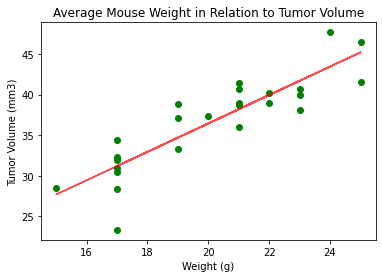

In [36]:
avg_weight = capomulin_combined['Weight (g)']
avg_tumor = capomulin_combined['Tumor Volume (mm3)']


plt.scatter(avg_weight,avg_tumor, color="green")
plt.title('Average Mouse Weight in Relation to Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(avg_weight, regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
print(f'line equation: {line_eq}')
print(f'r-squared: {rvalue**2}')
